## DECISION TREES

## IMPORT MAJOR LIBRARIES

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [9]:
df1 = pd.read_csv(r"C:\module 7\DT_dataset1.csv")
df1

,Day,Outlook,Temp,Humidity,Wind,Play Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [11]:
df1.columns

Index(['Day', 'Outlook', 'Temp', 'Humidity', 'Wind', 'Play Tennis'], dtype='object')

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [50]:
sklearn??

Type:        module
String form: <module 'sklearn' from 'C:\\Anaconda\\Lib\\site-packages\\sklearn\\__init__.py'>
File:        c:\anaconda\lib\site-packages\sklearn\__init__.py
Source:     
"""
The :mod:`sklearn` module includes functions to configure global settings and
get information about the working environment.
"""

# Machine learning module for Python
# ==================================
#
# sklearn is a Python module integrating classical machine
# learning algorithms in the tightly-knit world of scientific Python
# packages (numpy, scipy, matplotlib).
#
# It aims to provide simple and efficient solutions to learning problems
# that are accessible to everybody and reusable in various contexts:
# machine-learning as a versatile tool for science and engineering.
#
# See https://scikit-learn.org for complete documentation.

import logging
import os
import random
import sys

from ._config import config_context, get_config, set_config

logger = logging.getLogger(__name__)


# PEP044

In [52]:
le = LabelEncoder()
cols = ['Outlook', 'Temp', 'Humidity', 'Wind', 'Play Tennis']
for col in cols:
    df1[col] = le.fit_transform(df1[col])

In [54]:
df1

,Day,Outlook,Temp,Humidity,Wind,Play Tennis
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [56]:
dt1 = DecisionTreeClassifier()

In [58]:
Features = df1[['Outlook', 'Temp', 'Humidity', 'Wind']]
target = df1['Play Tennis']

In [114]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size = 0.2, random_state = 5)

In [116]:
dt1.fit(x_train, y_train)

DecisionTreeClassifier()

In [118]:
pred = dt1.predict(x_test)

In [120]:
accuracy_score(y_test, pred)

0.6666666666666666

## PLOTTING THE TREE

In [124]:
from sklearn.tree import plot_tree

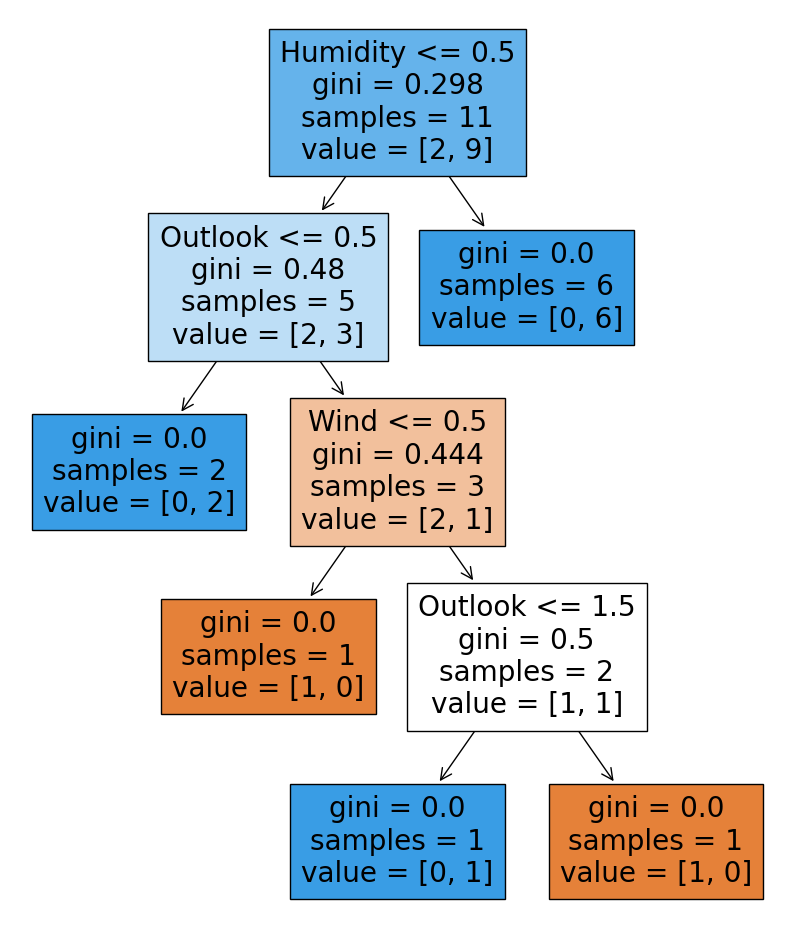

In [130]:
plt.figure(figsize = (10, 12))
plot_tree(dt1, filled = True, feature_names = Features.columns)
plt.show()

## ANOTHER DATASET

In [135]:
df2 = pd.read_csv(r"C:\module 7\DT_dataset2.csv")
df2

,CGPA,Interactive,Practical Knowledge,Skills,Job Offer
0,>=9,Yes,Very good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very good,Good,Yes
8,>=8,Yes,Good,Good,Yes
9,>=8,Yes,Average,Good,Yes


In [137]:
df2.columns

Index(['CGPA', 'Interactive', 'Practical Knowledge', 'Skills', 'Job Offer'], dtype='object')

In [141]:
LE = LabelEncoder()
cols = ['CGPA', 'Interactive', 'Practical Knowledge', 'Skills']
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [143]:
df2

,CGPA,Interactive,Practical Knowledge,Skills,Job Offer
0,2,1,2,0,Yes
1,1,0,1,1,Yes
2,2,0,0,2,No
3,0,0,0,0,No
4,1,1,1,1,Yes
5,2,1,1,1,Yes
6,0,1,1,2,No
7,2,0,2,0,Yes
8,1,1,1,0,Yes
9,1,1,0,0,Yes


In [145]:
dt2 = DecisionTreeClassifier()

In [147]:
Features = df2[['CGPA', 'Interactive', 'Practical Knowledge', 'Skills']]
target = df2['Job Offer']

In [149]:
dt2.fit(Features, target)

DecisionTreeClassifier()

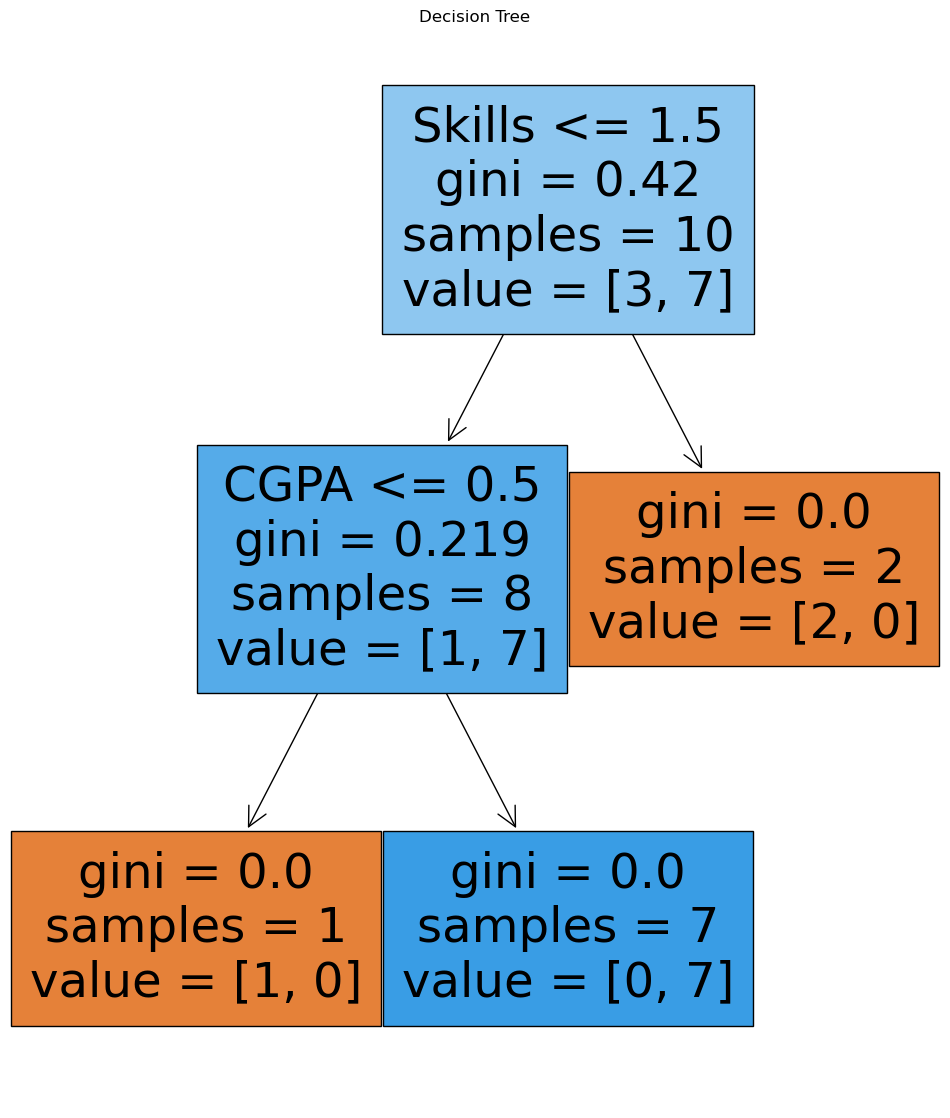

In [151]:
plt.figure(figsize = (12, 14))
plot_tree(dt2, filled = True, feature_names = Features.columns)
plt.title('Decision Tree')
plt.show()

## ANOTHER DATASET

In [156]:
df3 = pd.read_csv(r"C:\module 7\RF_Dataset1_heart_v2.csv")
df3

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [158]:
df3.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [162]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [164]:
df3.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [170]:
cat = df3.select_dtypes(include = ['object', 'category']).columns
for x in cat:
    df3[x] = le.fit_transform(df3[x])
df3

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [172]:
Features = df3.drop(columns = ['heart disease'])
target = df3['heart disease']

In [198]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size = 0.2, random_state = 5)

In [200]:
dt3 = DecisionTreeClassifier()

In [202]:
dt3.fit(x_train, y_train)

DecisionTreeClassifier()

In [204]:
y_pred = dt3.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [206]:
accuracy_score(y_test, y_pred)

0.6851851851851852

In [214]:
cm = classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        34
           1       0.57      0.65      0.60        20

    accuracy                           0.69        54
   macro avg       0.67      0.68      0.67        54
weighted avg       0.70      0.69      0.69        54



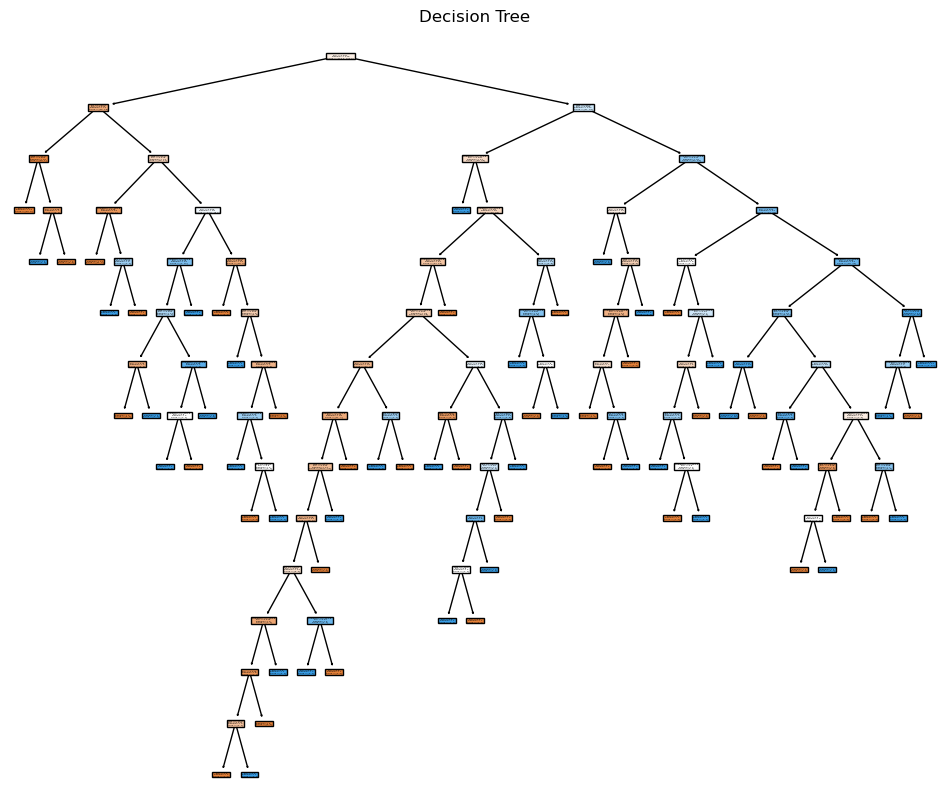

In [220]:
plt.figure(figsize = (12,10))
plot_tree(dt3, filled = True, feature_names = Features.columns)
plt.title('Decision Tree')
plt.show()